In [1]:
#For google colab

"""def mount_drive(dir):
  import os
  colab = 1
  if colab == 1:
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    current_folder = dir
    dest_folder = '/content/drive/My Drive/' + current_folder
    os.chdir(dest_folder)
    print('\n Current path: ' + os.getcwd())

mount_drive('')"""

"def mount_drive(dir):\n  import os\n  colab = 1\n  if colab == 1:\n    from google.colab import drive\n    drive.mount('/content/drive', force_remount = True)\n    current_folder = dir\n    dest_folder = '/content/drive/My Drive/' + current_folder\n    os.chdir(dest_folder)\n    print('\n Current path: ' + os.getcwd())\n\nmount_drive('')"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
from collections import Counter
import datetime
from matplotlib.pyplot import figure
import numpy as np
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Preprocessing(Mainly)

In [2]:
load_dotenv(dotenv_path=Path(r"C:\Users\EJTri\Documents\spotify\eda\eda_with_sql.ipynb").resolve().parent.parent / ".env")

db_user = os.getenv("POSTGRES_USER")
db_pass = os.getenv("POSTGRES_PASSWORD")
db_host = os.getenv("POSTGRES_HOST")
db_port = os.getenv("POSTGRES_PORT")
db_name = os.getenv("POSTGRES_DB")

engine = create_engine(f"postgresql+psycopg2://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}")

In [3]:
all_tracks = pd.read_sql("SELECT * FROM all_tracks_saved", engine)
recent_songs = pd.read_sql("SELECT * FROM recent_songs", engine)
top_art = pd.read_sql("SELECT * FROM top_artists", engine)
top_songs = pd.read_sql("SELECT * FROM top_songs", engine)

### Facorite Arists and Songs

In [4]:
short_top_art = top_art[top_art["time_frame"] == "short"]
med_top_art = top_art[top_art["time_frame"] == "medium"]
long_top_art = top_art[top_art["time_frame"] == "long"]

print("RECENT FAVORITE ARTISTS:\n" + "\n".join(short_top_art["artist_name"].iloc[:5]) + "\n")
print("MEDIUM TIME FRAME FAVORITE ARTISTS:\n" + "\n".join(med_top_art["artist_name"].iloc[:5]) + "\n")
print("LONG TIME FRAME FAVORITE ARTISTS:\n" + "\n".join(long_top_art["artist_name"].iloc[:5]) + "\n")

RECENT FAVORITE ARTISTS:
Papa Roach
Breaking Benjamin
Kid Cudi
Seiko Matsuda
Led Zeppelin

MEDIUM TIME FRAME FAVORITE ARTISTS:
Counting Crows
Led Zeppelin
Pepper
Blues Traveler
Cage The Elephant

LONG TIME FRAME FAVORITE ARTISTS:
Cage The Elephant
Toadies
TOOL
Pearl Jam
Red Hot Chili Peppers



In [100]:
short_top_songs = top_songs[top_songs["term"] == "short"]
med_top_songs = top_songs[top_songs["term"] == "medium"]
long_top_songs = top_songs[top_songs["term"] == "long"]

print("RECENT FAVORITE SONGS:\n" + "\n".join(short_top_songs["track_name"].iloc[:5]) + "\n")
print("MEDIUM TIME FRAME FAVORITE SONGS:\n" + "\n".join(med_top_songs["track_name"].iloc[:5]) + "\n")
print("LONG TIME FRAME FAVORITE SONGS:\n" + "\n".join(long_top_songs["track_name"].iloc[:5]) + "\n")

RECENT FAVORITE SONGS:
The Diary of Jane - Single Version
Savior
love.
Lakini's Juice
Metallic Taste

MEDIUM TIME FRAME FAVORITE SONGS:
Sooner Or Later
The Diary of Jane - Single Version
Savior
Transdermal Celebration
Cobrastyle (feat. Mad Cobra) - As featured in Superman

LONG TIME FRAME FAVORITE SONGS:
Antpile 2
In Bloom
Killed By An Angel
Beer
Concorde



Fixing the storage of the genre list from text -> python list

In [9]:
all_tracks["artist_genre"] = all_tracks["artist_genre"].apply(literal_eval)
top_art["artist_genre"] = top_art["artist_genre"].apply(literal_eval)
top_songs["artist_genre"] = top_songs["artist_genre"].apply(literal_eval)

In [10]:
all_tracks = all_tracks.dropna()

A song within one of the playlist is missing most values and has a duration of 0 ,so get rid of it and make sure there are no other songs with 0 minute duration.

In [11]:
all_tracks = all_tracks.drop(all_tracks[all_tracks.song_duration_minutes == 0.000000].index)

Bucket the top songs, all songs, and recently listened to songs into what decade they reside in.

In [12]:
top_songs['release_date'] = pd.to_datetime(top_songs['release_date'], format='mixed')
top_songs = top_songs.dropna(subset=['release_date'])
top_songs['decade'] = (top_songs['release_date'].dt.year // 10) * 10
top_songs['decade'] = top_songs['decade'].astype(int).astype(str) + 's'

recent_songs['release_date'] = pd.to_datetime(recent_songs['release_date'], format='mixed')
recent_songs = recent_songs.dropna(subset=['release_date'])
recent_songs['decade'] = (recent_songs['release_date'].dt.year // 10) * 10
recent_songs['decade'] = recent_songs['decade'].astype(int).astype(str) + 's'

all_tracks['release_date'] = pd.to_datetime(all_tracks['release_date'], format='mixed')
all_tracks = all_tracks.dropna(subset=['release_date'])
all_tracks['decade'] = (all_tracks['release_date'].dt.year // 10) * 10
all_tracks['decade'] = all_tracks['decade'].astype(int).astype(str) + 's'

In [32]:
colors_box_sub_plot = [
    "#76d7c4",  # teal/mint
    "#a9dfbf",  # pastel green
    "#17becf",  # cyan-blue
    "#82e0aa"   # soft lime green
]

Looking at the distribution of all of my saved tracks by popularity, duration, what decade it resides in, and the number of tracks on its album. All distrubutions make sense the popularity shows that a large portion of my songs saved have a very low popularity with a normal distrubtion otherwise. The decade distrubtion plot is strange and has gaps for a few decades which seems unlikely(look more into this).

Text(0.5, 1.0, 'Album Track Number Distribution')

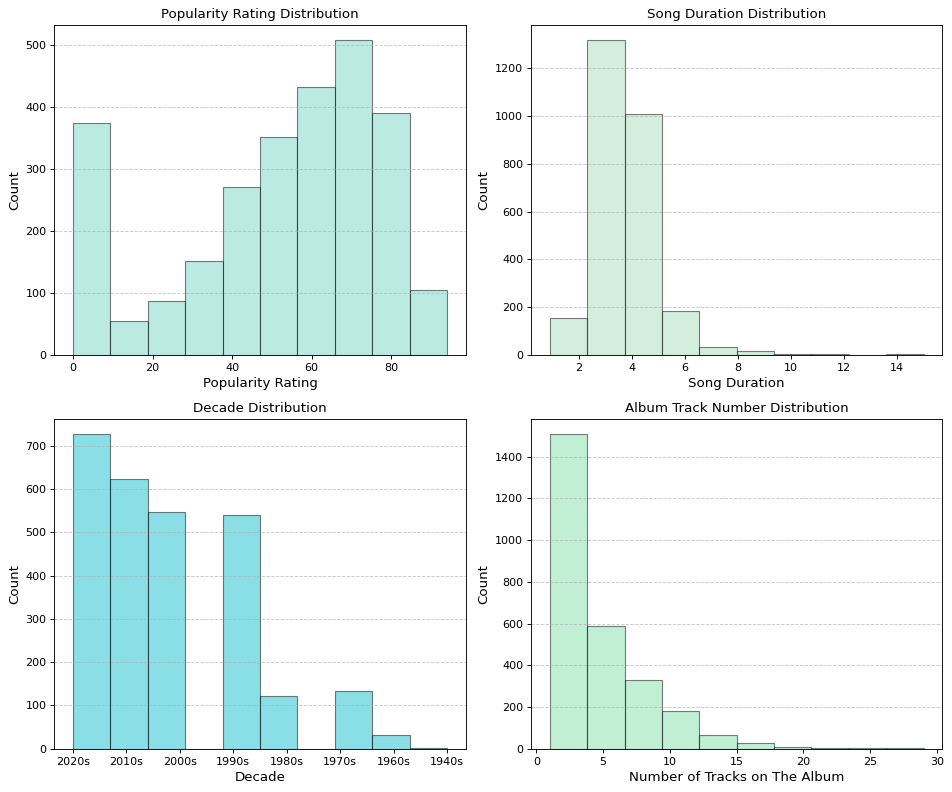

In [34]:
figure(figsize=(12, 10), dpi=80)

plt.subplot(2, 2, 1)
plt.hist(all_tracks["popularity_score"], color = colors_box_sub_plot[0], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Popularity Rating", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Popularity Rating Distribution")

plt.subplot(2, 2, 2)
plt.hist(all_tracks["song_duration_minutes"], color = colors_box_sub_plot[1], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Song Duration", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Song Duration Distribution")

plt.subplot(2, 2, 3)
plt.hist(all_tracks["decade"], color = colors_box_sub_plot[2], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decade", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Decade Distribution")

plt.subplot(2, 2, 4)
plt.hist(all_tracks["track_number_on_album"], color = colors_box_sub_plot[3], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Number of Tracks on The Album", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Album Track Number Distribution")

Creating a list of all genres that I have saved(duplicates included to get an overal count of what genres I have saved and how many times).

In [15]:
list_genres_in_all_tracks = []

for i in range(0, len(all_tracks)):
  list_genres_in_all_tracks = list_genres_in_all_tracks + all_tracks.iloc[i]["artist_genre"]

count_genres = Counter(list_genres_in_all_tracks)

In [16]:
count_genres_top_10 = dict(sorted(count_genres.items(), key=lambda x: x[1], reverse=True)[:10])

X_value_genres = list(count_genres_top_10.keys())
Y_value_genres = list(count_genres_top_10.values())

From the plot I can see that I mostly have post-grunge, rock, and grunge songs saved throughout my playlists.

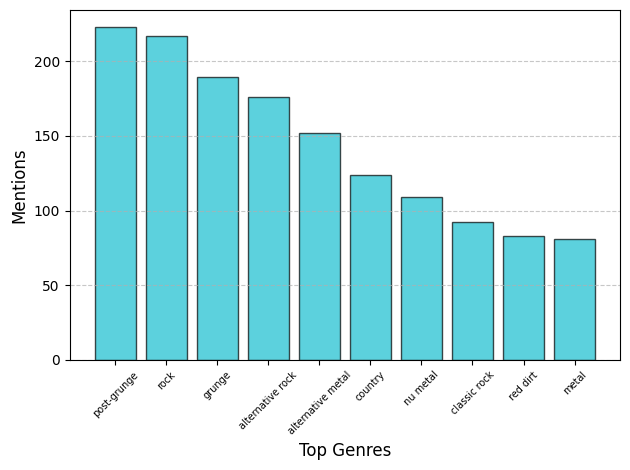

In [17]:
plt.bar(X_value_genres, Y_value_genres, color='#17becf', alpha=0.7, edgecolor='black')
plt.ylabel("Mentions", fontsize=12)
plt.xlabel("Top Genres", fontsize=12)
plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [5]:
overall_top_decade_count = top_songs["decade"].value_counts().sort_index()
terms_top_decade_count = top_songs.groupby('term')['decade'].value_counts().sort_index()

KeyError: 'decade'

In [19]:
overall_count_vals = overall_top_decade_count.values
overall_count_keys = overall_top_decade_count.keys()

long_term_vals = terms_top_decade_count["long"].values
long_term_keys = terms_top_decade_count["long"].keys()

med_term_vals = terms_top_decade_count["medium"].values
med_term_keys = terms_top_decade_count["medium"].keys()

short_term_vals = terms_top_decade_count["short"].values
short_term_keys = terms_top_decade_count["short"].keys()

In [29]:
colors_box_sub_plot2 = [
    "#1f77b4",  # muted blue
    "#2ca02c",  # rich green
    "#5dade2",  # sky blue
    "#58d68d",  # light green
]

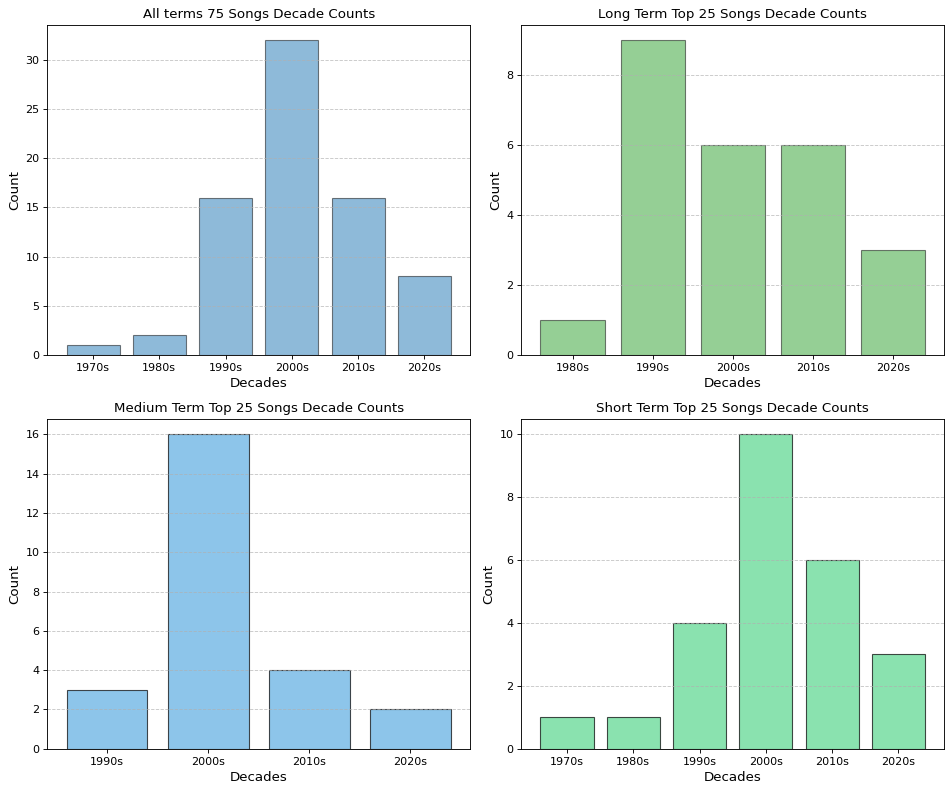

In [30]:
figure(figsize=(12, 10), dpi=80)

plt.subplot(2, 2, 1)
plt.bar(overall_count_keys,overall_count_vals, color = colors_box_sub_plot2[0], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("All terms 75 Songs Decade Counts")

plt.subplot(2, 2, 2)
plt.bar(long_term_keys, long_term_vals, color = colors_box_sub_plot2[1], alpha=0.5, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Long Term Top 25 Songs Decade Counts")

plt.subplot(2, 2, 3)
plt.bar(med_term_keys, med_term_vals, color = colors_box_sub_plot2[2], alpha=0.7, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Medium Term Top 25 Songs Decade Counts")

plt.subplot(2, 2, 4)
plt.bar(short_term_keys, short_term_vals, color = colors_box_sub_plot2[3], alpha=0.7, edgecolor='black')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Decades", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Short Term Top 25 Songs Decade Counts")


plt.show()

In [22]:
top_songs_short = top_songs[top_songs["term"] == "short"]
top_songs_med = top_songs[top_songs["term"] == "medium"]
top_songs_long = top_songs[top_songs["term"] == "long"]

short_songs_duration = np.array(top_songs_short["song_duration_minutes"])
med_songs_duration = np.array(top_songs_med["song_duration_minutes"])
long_songs_duration = np.array(top_songs_long["song_duration_minutes"])

most_recent_25_songs = recent_songs.iloc[:25]["song_duration_minutes"]
recent_songs_duration = np.array(most_recent_25_songs)

In [23]:
combined_durations = [short_songs_duration, med_songs_duration, long_songs_duration, recent_songs_duration]

mean = [np.mean(d) for d in combined_durations]
std_devs = [np.std(d) for d in combined_durations]

The green(teal) dot is the mean with the line being the standard deviation while the blue line is the median.


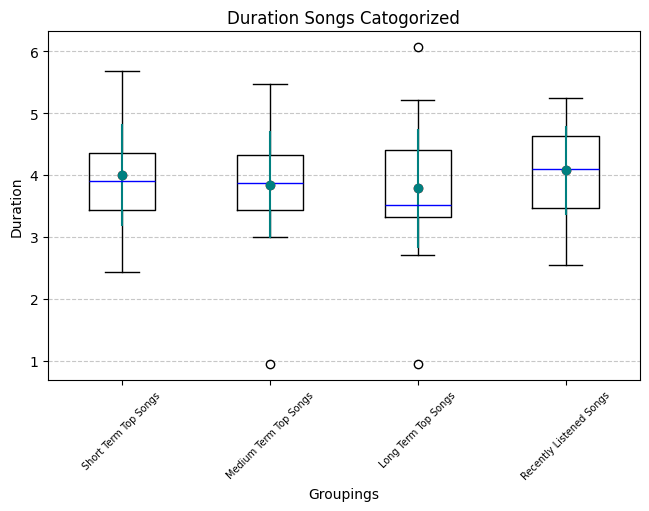

In [24]:
print("The green(teal) dot is the mean with the line being the standard deviation while the blue line is the median.")

plt.boxplot(combined_durations, positions=[1, 2, 3, 4], tick_labels = ["Short Term Top Songs", "Medium Term Top Songs",
                                                                  "Long Term Top Songs", "Recently Listened Songs"],
            medianprops=dict(color='blue'))

for i in range(len(mean)):
   plt.plot(i + 1, mean[i], 'ro')
   plt.errorbar(i + 1, mean[i], yerr=std_devs[i], fmt='o', color='teal')

plt.xticks(rotation=45, fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.title("Duration Songs Catogorized")
plt.xlabel("Groupings")
plt.ylabel("Duration")
plt.show()

In [40]:
all_tracks["release_date"] = all_tracks["release_date"].apply(pd.to_datetime)
all_tracks["release_date_sec"] = [(i - min(all_tracks["release_date"])).total_seconds() for i in all_tracks["release_date"]]

all_tracks_numeric = all_tracks.select_dtypes(include='number') 

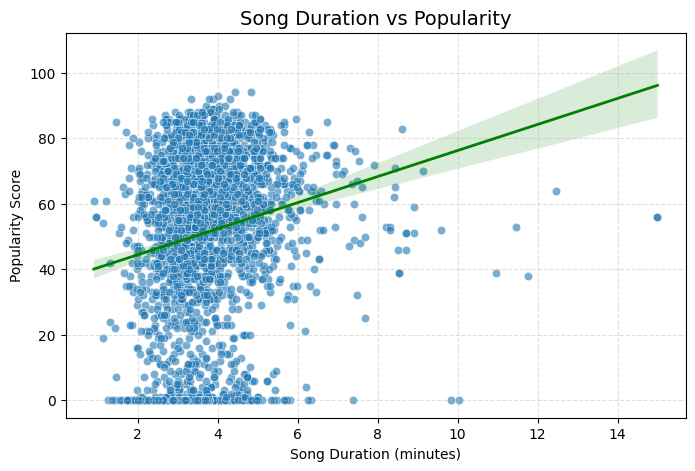

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=all_tracks, x='song_duration_minutes', y='popularity_score', alpha=0.6)
sns.regplot(data=all_tracks, x='song_duration_minutes', y='popularity_score', scatter=False, color='green', line_kws={'linewidth':2})
plt.title("Song Duration vs Popularity", fontsize=14)
plt.xlabel("Song Duration (minutes)")
plt.ylabel("Popularity Score")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

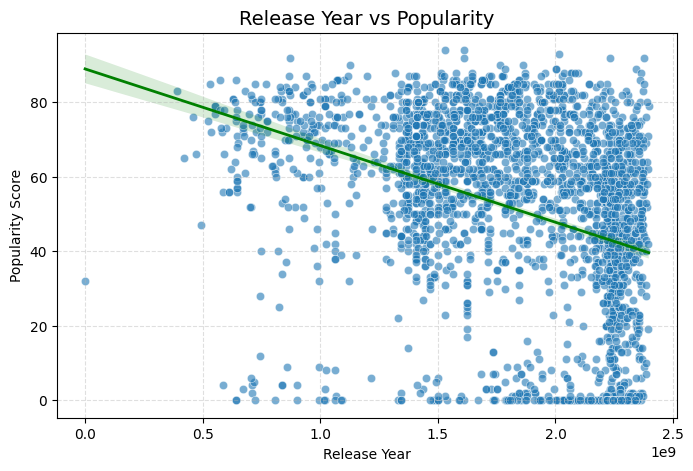

In [70]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=all_tracks, x='release_date_sec', y='popularity_score', alpha=0.6)
sns.regplot(data=all_tracks, x='release_date_sec', y='popularity_score', scatter=False, color='green', line_kws={'linewidth':2})
plt.title("Release Year vs Popularity", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Popularity Score")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


In [59]:
all_track_normalized = StandardScaler().fit_transform(all_tracks_numeric)
all_track_normalized_df = pd.DataFrame(data = all_track_normalized, columns = all_tracks_numeric.columns, index = all_tracks_numeric.index)
print(all_track_normalized_df.head())

   album_track_amount  song_duration_minutes  popularity_score  \
0           -0.180559              -2.436801          0.173670   
1           -0.273606               0.202196          0.289314   
2           -0.087512               0.990593         -0.250355   
3            0.284677              -0.230214          0.366409   
4           -0.180559               1.970685          0.250766   

   track_number_on_album  release_date_sec  
0               1.488371          1.226029  
1               0.184790          0.636975  
2              -0.858075         -0.468076  
3               0.445506         -0.780199  
4              -0.336643          1.042619  


In [60]:
pca = PCA(n_components=all_tracks_numeric.shape[1])
pcaNewData = pca.fit_transform(all_track_normalized_df)

pc = pca.components_
pc_df = pd.DataFrame(data = pc, index = all_track_normalized_df.columns, columns=["PC" + str(i) for i in range(all_track_normalized_df.shape[1])])

print(pc_df.iloc[:, 0:4])

evp = pca.explained_variance_ratio_
print()
print(evp)

                            PC0       PC1       PC2       PC3
album_track_amount    -0.486650 -0.406023 -0.431256 -0.359685
song_duration_minutes  0.394750 -0.323381 -0.379332  0.715132
popularity_score      -0.093130  0.780047 -0.613911  0.057616
track_number_on_album  0.628333 -0.201054 -0.426481 -0.545050
release_date_sec       0.451518  0.285786  0.333695 -0.242515

[0.38677021 0.20206647 0.16514538 0.13264689 0.11337104]


In [61]:
distances = np.linalg.norm(pcaNewData[:, :2], axis=1)
top_outlier_indices = np.argsort(distances)[-15:]

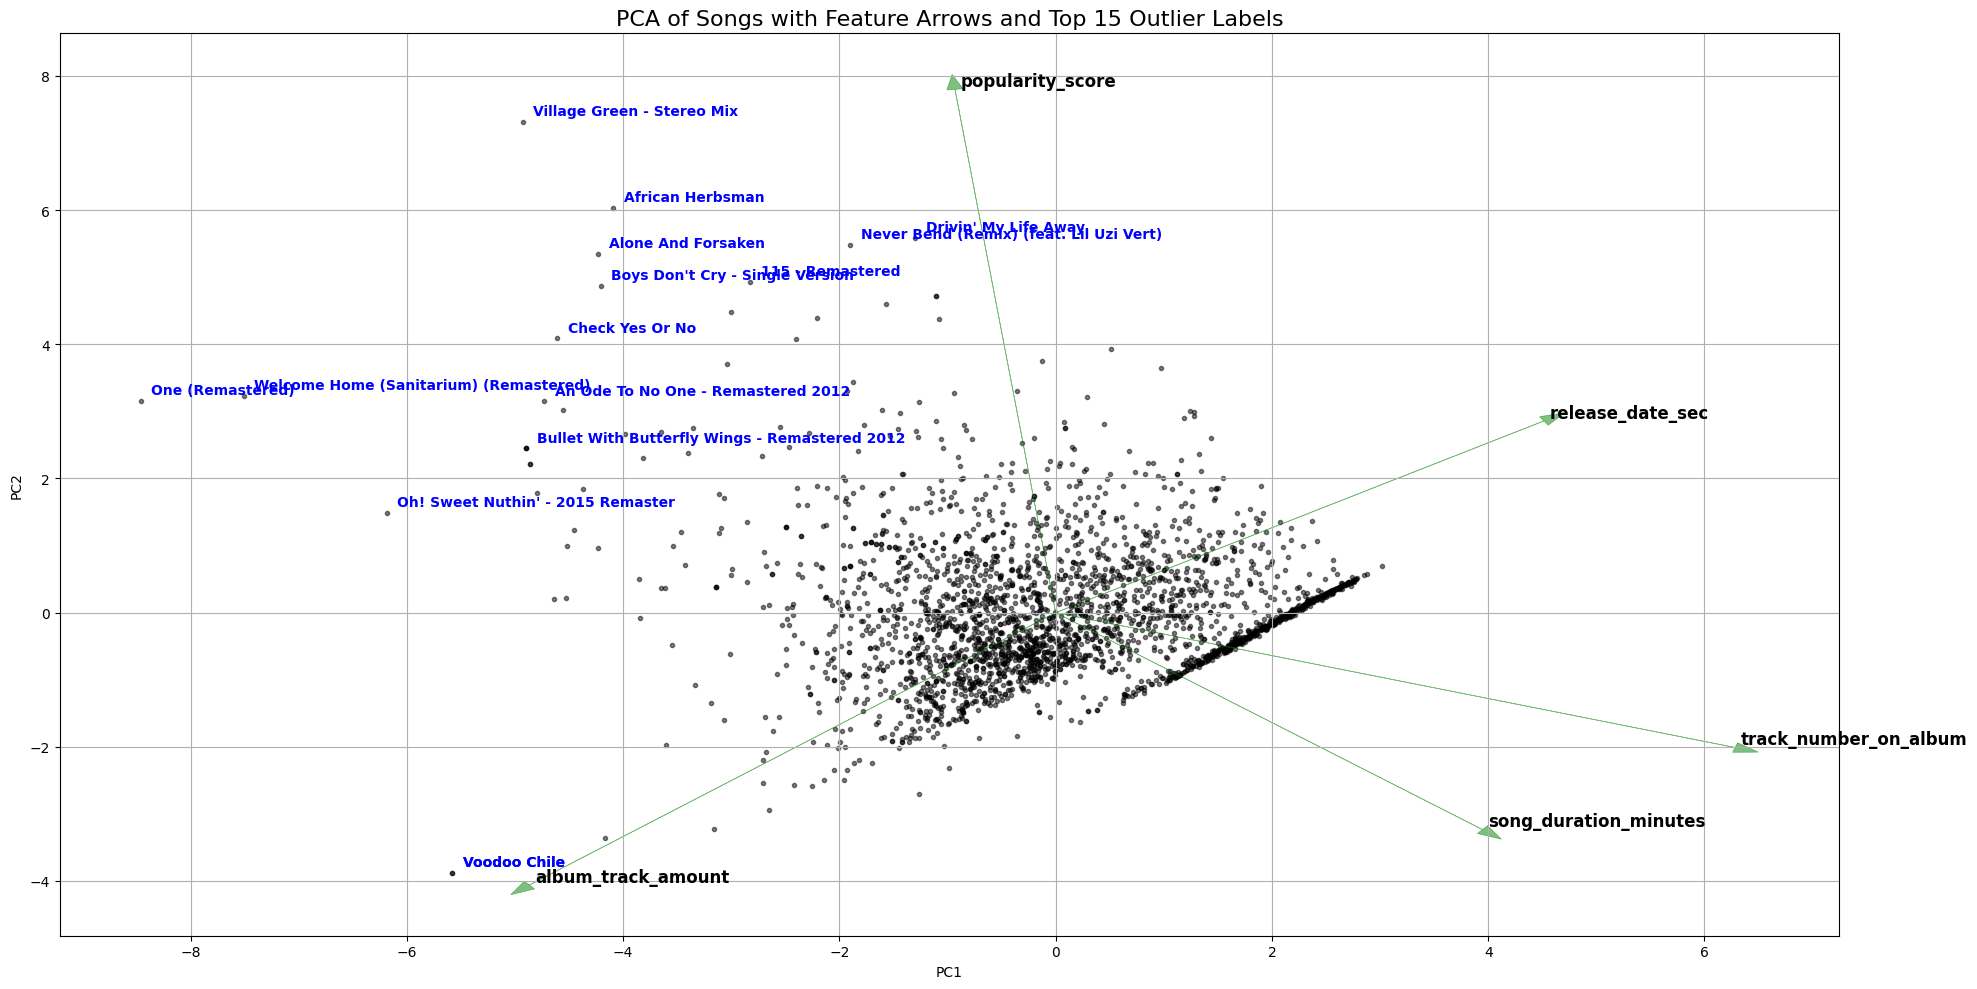

In [65]:


fig = plt.figure(figsize=(20, 10))

for i in range(len(pcaNewData)):
    plt.scatter(pcaNewData[i, 0], pcaNewData[i, 1], marker='.', c='black', alpha=0.5)

for idx in top_outlier_indices:
    x, y = pcaNewData[idx, 0], pcaNewData[idx, 1]
    song_name = all_tracks.iloc[idx]["track_name"] 
    plt.text(x + 0.1, y + 0.1, song_name, fontsize=10, color='blue', fontweight='bold')

scale = 10
for k in range(all_track_normalized_df.shape[1]):
    plt.text(pc_df.iloc[k, 0] * scale + 0.05,
             pc_df.iloc[k, 1] * scale + 0.05,
             pc_df.index[k],
             c='k', fontweight='bold', fontsize=12)
    plt.arrow(0, 0,
              pc_df.iloc[k, 0] * scale,
              pc_df.iloc[k, 1] * scale,
              color='g', head_width=0.15, linewidth=0.5, alpha=0.5)

plt.title("PCA of Songs with Feature Arrows and Top 15 Outlier Labels", fontsize=16)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()